<a href="https://colab.research.google.com/github/AngeClementAkazan/Saving-Model/blob/main/Saving%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression Model

In [ ]:
#Import library
import tensorflow as tf
#Other library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Get data
# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
#Load data
dta=pd.read_csv('moore.csv',header=None).to_numpy()
X=dta[:,0].reshape(-1,1) #Making 2D array
Y1=dta[:,1]


#The result looks like an exponential growth, therefore, to stdy this data one can apply log to the Y and transform into a linear regression study
Y=np.log(Y1)

#To reduce the input
X=X-X.mean()
#Building model
model= tf.keras.models.Sequential( [tf.keras.layers.Input(shape=(1,)), #the model an
                      tf.keras.layers.Dense(1)]
                                 )
# model=tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape=(1,), ))

#We customize the optimizer to avoid issues in the training because we did not scale the input data
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',

)

#Define Scheduled learning rate

def schedule(epoch,lr):
  if epoch>= 90:
    return 0.0001
  return 0.001
#Define the learning rate scheduler object
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)
#Fitting model
r = model.fit(X,Y, epochs= 200, callbacks=[scheduler], verbose=0)


#Getting slope and intercept
print("slope={}".format(model.layers[0].get_weights()[0][0,0]))
print("intercept={}".format(model.layers[0].get_weights()[1][0]))

slope=0.34200456738471985
intercept=17.778844833374023


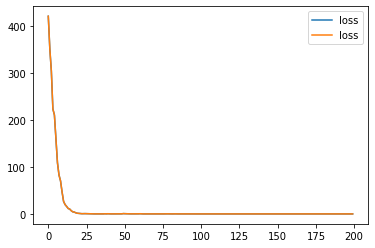

In [ ]:

#Plotting loss function / epochs
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['loss'], label='loss')
plt.legend();


# 2. Saving the model

In [ ]:
#Saving the model
model.save('LinearRegression')

### equivalent to: model.save("")
# from tensorflow.keras.models import save_model
# save_model(model, "")

#Check whether that file exist 
!ls -lh


#Load model 

from tensorflow.keras.models import load_model
mod=tf.keras.models.load_model("LinearRegression")

In [ ]:
#Save model using Json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


In [ ]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import  model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
# print("Loaded model from disk")



Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

mse: 87.05%


In [ ]:
#Download model in my local desktop
from google.colab import files
files.download('LinearRegression.h5')